# Query for existing Master-bias calib collections

 work with Weakly_2022_39
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/11/09
- update : 2022/11/09


In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/atmospec 	setup
drp_pipe              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/drp_pipe 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_39/conda/envs/lsst-scipipe-4.1.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_39/rapid_analysis 	setup


In [2]:
! eups list -s lsst_distrib

   g0b29ad24fb+a10408d0bf 	w_latest current w_2022_39 setup


In [3]:
import lsst.daf.butler as dafButler
import lsst.afw.display 

In [4]:
# Load libraries:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates

import lsst.daf.butler as dafButler
import lsst.afw.display 
import lsst.display.matplotlib
lsst.afw.display.setDefaultBackend("matplotlib")

In [5]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

In [6]:
for c in sorted(registry.queryCollections()):
    if 'u/dagoret/first_test' in c:
        pass
    else:
        print(c)

LATISS/calib
LATISS/calib/DM-28636
LATISS/calib/DM-28636/curated/19700101T000000Z
LATISS/calib/DM-28636/curated/20180101T000000Z
LATISS/calib/DM-28636/unbounded
LATISS/calib/DM-33875
LATISS/raw/all
refcats
u/calib/DM-32209-20211013a-felh
u/calib/DM-32209-20211013a-g
u/czw/DM-28920/biasGen.20210702a/20210702T215049Z
u/czw/DM-28920/calib/bias.20210720
u/czw/DM-28920/calib/dark.20210720a
u/czw/DM-28920/calib/defect.20210720a
u/czw/DM-28920/calib/flat.20210720
u/czw/DM-28920/darkGen.20210707d/20210707T215331Z
u/czw/DM-28920/defectGen.20210720a/20210720T230634Z
u/czw/DM-28920/flatGen.20210720Xa/20210720T223935Z
u/czw/DM-28920/flatGen.20210720Xb/20210720T225330Z
u/czw/DM-32209/flatGen.20211013a-felh/20211013T214128Z
u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z
u/czw/calibX
u/czw/calibX.20220608
u/czw/defects.20220608
u/dagoret/bootcamp.20220818/biasGen.20220818a
u/dagoret/bootcamp.20220818/biasGen.20220818a/20220818T154547Z
u/dagoret/bootcamp.20220818/biasGen.20220818a/20220818T154814

## In my flat


In [18]:
# Which calibration type to analyse.
calibType = 'bias'
physical_filter = 'empty~empty'
detectorId = 0
# Camera
cameraName = 'LATISS'

# Collection name containing the verification outputs.
calib_collection=[
"u/dagoret/mybias.20221113/biasGen.20220317a",
]
calib_collection=[
"LATISS/calib",'LATISS/calib/DM-28636',
'LATISS/calib/DM-33875',"u/calib/DM-32209-20211013a-felh",
"u/calib/DM-32209-20211013a-g",
"u/czw/DM-28920/biasGen.20210702a/20210702T215049Z",
"u/czw/DM-28920/calib/bias.20210720",
"u/czw/DM-28920/calib/dark.20210720a",
"u/czw/DM-28920/calib/defect.20210720a",
"u/czw/DM-28920/calib/flat.20210720",
"u/czw/DM-28920/darkGen.20210707d/20210707T215331Z",
"u/czw/DM-28920/defectGen.20210720a/20210720T230634Z",
"u/czw/DM-28920/flatGen.20210720Xa/20210720T223935Z",
"u/czw/DM-28920/flatGen.20210720Xb/20210720T225330Z",
"u/czw/DM-32209/flatGen.20211013a-felh/20211013T214128Z",
"u/czw/DM-32209/flatGen.20211013a-g/20211013T185808Z",
"u/czw/calibX",
"u/czw/calibX.20220608",
"u/czw/defects.20220608"]

In [19]:
# Get butler and camera
butler = dafButler.Butler('/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml', collections=calib_collection)
camera = butler.get('camera', instrument=cameraName)

In [20]:
calib = butler.get(calibType, instrument=cameraName, detector=detectorId)
calibArray = calib.getImage().getArray()

vmin=-51.139,vmax=46343.961,vmean=12.071,vmed=4.444,vstd=360.141


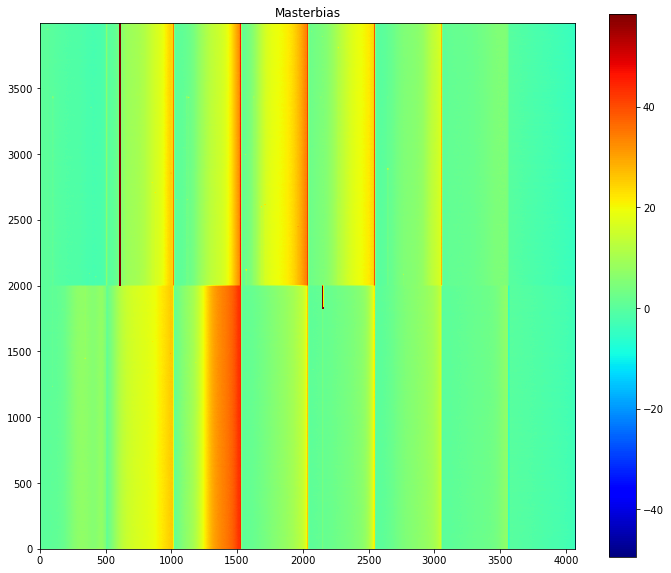

In [21]:
vmin=calib.image.array.min()
vmax=calib.image.array.max()
vmean=calib.image.array.mean()
vmed=np.median(calib.image.array)
vstd=np.std(calib.image.array)
print(f"vmin={vmin:.3f},vmax={vmax:.3f},vmean={vmean:.3f},vmed={vmed:.3f},vstd={vstd:.3f}")
nsig=1.5/10
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,10))
im=ax.imshow(calib.image.array,origin="lower",vmin=vmed-nsig*vstd,vmax=vmed+nsig*vstd,cmap="jet")
ax.set_title("Masterbias")
fig.colorbar(im)

In [22]:
dict(calib.getMetadata())

{'CALIB_CREATE_DATE': '2021-07-02',
 'CALIB_CREATE_TIME': '16:54:53 CDT',
 'ORIGIN': 'LSST DM Header Service',
 'IMGTYPE': 'BIAS',
 'BUNIT': 'adu',
 'FACILITY': 'Vera C. Rubin Observatory',
 'TELESCOP': 'LSST AuxTelescope',
 'INSTRUME': 'LATISS',
 'OBSERVER': 'LSST',
 'OBSGEO-X': 1818938.94,
 'OBSGEO-Y': -5208470.95,
 'OBSGEO-Z': -3195172.08,
 'RA': 0.0,
 'DEC': 0.0,
 'ROTCOORD': 'sky',
 'HASTART': 0.0,
 'AMSTART': 0.0,
 'HAEND': 0.0,
 'AMEND': 0.0,
 'INSTPORT': 2,
 'TRACKSYS': 'LOCAL',
 'RADESYS': 'ICRS',
 'SHUTLOWR': 0.0,
 'WCSAXES': 2,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'CRVAL1': 0.0,
 'CRVAL2': 0.0,
 'CRPIX1': 2000.0,
 'CRPIX2': 2036.0,
 'EQUINOX': 2000.0,
 'CAMCODE': 'AT',
 'CONTRLLR': 'O',
 'TESTTYPE': None,
 'TSTAND': None,
 'OBSANNOT': '',
 'CCD_TYPE': 2,
 'LSST_NUM': 'ITL-3800C-068',
 'TEMP_SET': -94.1500015258789,
 'OVERH': 64,
 'OVERV': 48,
 'PREH': 0,
 'GRATING': 'empty_1',
 'GRATPOS': 1,
 'SHUTTIME': None,
 'INHERIT': True,
 

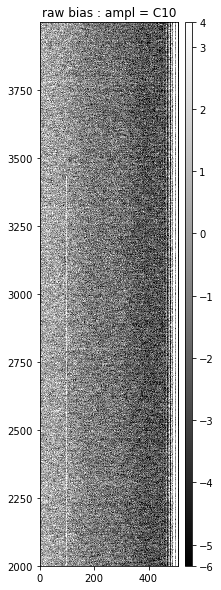

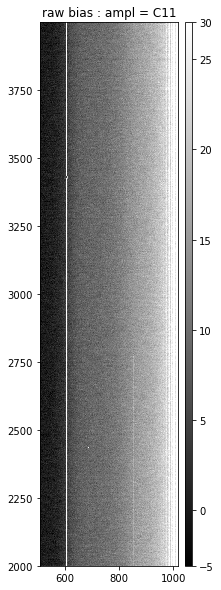

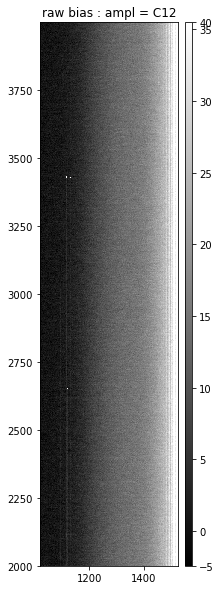

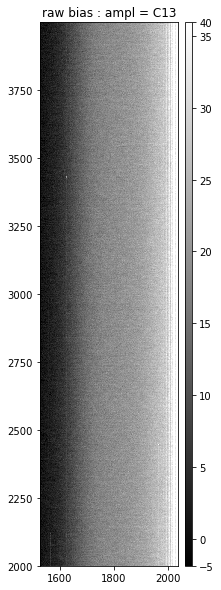

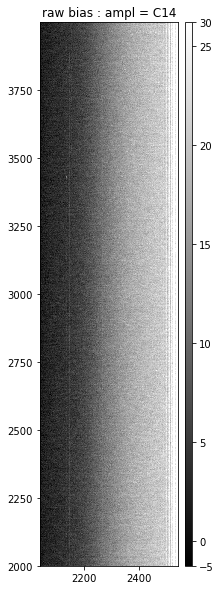

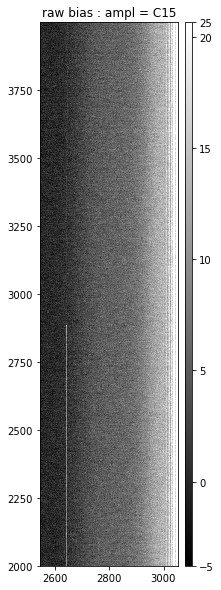

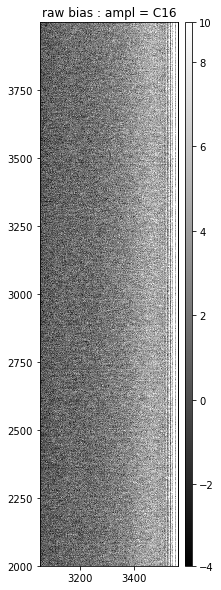

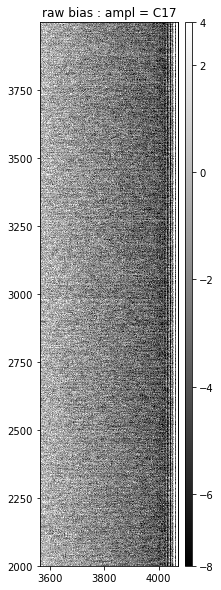

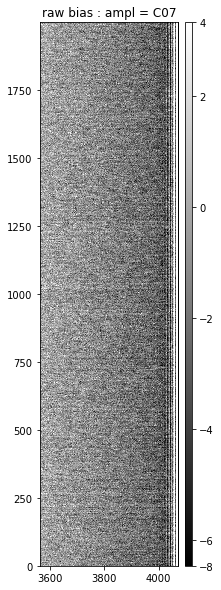

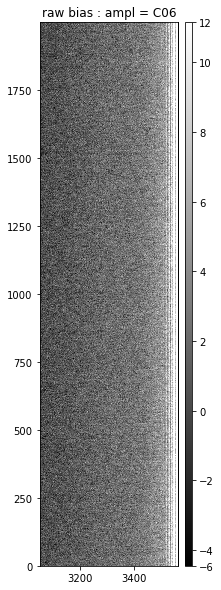

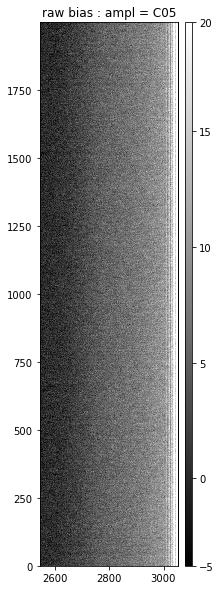

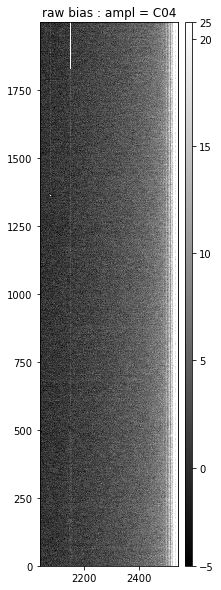

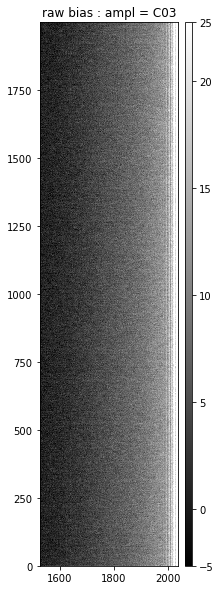

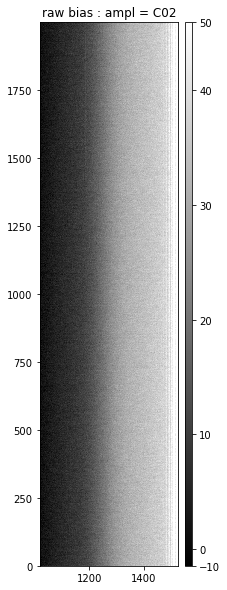

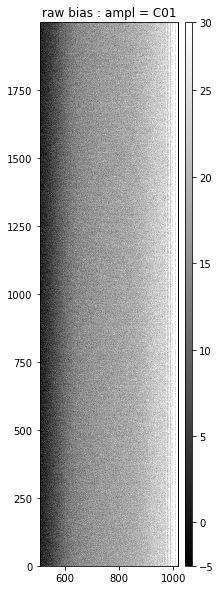

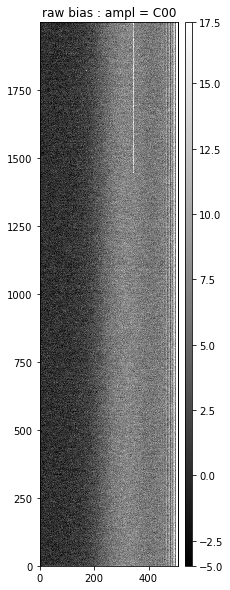

In [12]:
all_names = []
all_mean = []
all_median = []
all_std = []

for ampIdx, amp in enumerate(calib.getDetector()):
    ampName = amp.getName()
    # This can work only on postISRCCD
    ampExp = calib.Factory(calib, amp.getBBox())
    
    fig = plt.figure(figsize=(12,10))
    display = lsst.afw.display.Display(frame=fig)
    
    display.scale('linear', 'zscale',None)
    title = f"raw bias : ampl = {ampName}"
    display.mtv(ampExp.image,title=title)
    
    imgarr = ampExp.image.array
    all_names.append(ampName)
    all_mean.append(np.average(imgarr,axis=0))
    all_median.append(np.median(imgarr,axis=0))
    all_std.append(np.std(imgarr,axis=0))
    

In [13]:
N  = len(all_names)
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [14]:
indexes=np.argsort(all_names)

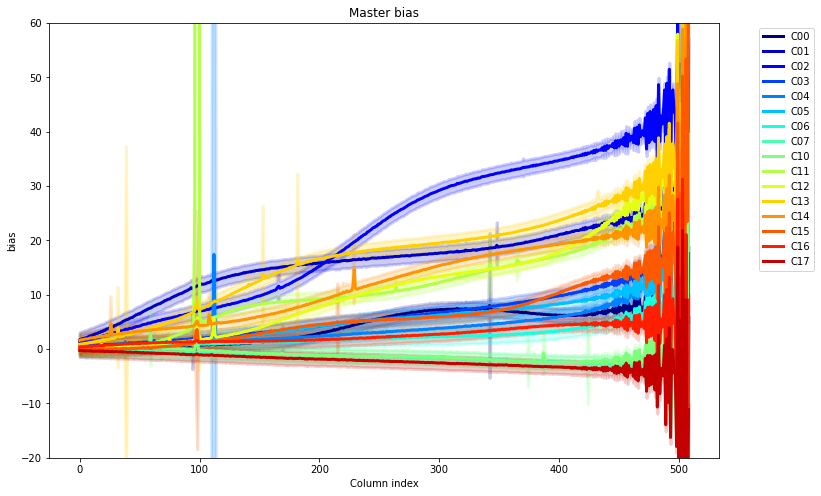

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,8))
for idx in range(N):
    idx1=indexes[idx]
    NX=all_median[idx1].shape[0]
    x=np.arange(NX)
    ax.plot(x,all_median[idx1],color=all_colors[idx],label=all_names[idx1],lw=3)
    ax.fill_between(x,y1=all_median[idx1]+all_std[idx1],y2=all_median[idx1]-all_std[idx1],color=all_colors[idx],alpha=0.2,lw=3)
ax.legend(bbox_to_anchor=(1.15, 1.0))
ax.set_title("Master bias")
ax.set_xlabel("Column index")
ax.set_ylabel("bias")
ax.set_ylim(-20,60)
plt.show()